In [10]:
import pandas as pd 
import numpy as np

data = pd.read_csv('../notebooks/data/merged_inputed_data.csv')

data
    

,meds_methadone_0,meds_buprenorphine_0,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,...,race_amer_ind,race_Asian,race_Black,race_pacific_isl,race_White,medication,total_visits,TNT,CNT,responder
0,0.0,8.0,0.0,160.0,0.0,320.0,0.0,192.0,0.0,384.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,20,8,1
1,0.0,8.0,0.0,48.0,0.0,48.0,0.0,60.0,0.0,48.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,6,4,0
2,30.0,0.0,170.0,0.0,310.0,0.0,420.0,0.0,360.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,26,0,0,0
3,0.0,16.0,0.0,152.0,0.0,192.0,0.0,160.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,4,1,0
4,0.0,16.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,30.0,0.0,270.0,0.0,390.0,0.0,560.0,0.0,420.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,26,14,10,1
1301,0.0,8.0,0.0,32.0,0.0,64.0,0.0,80.0,0.0,96.0,...,0.0,0.0,0.0,0.0,1.0,2.0,15,0,0,0
1302,30.0,0.0,690.0,0.0,1460.0,0.0,100.0,0.0,1400.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,26,15,7,0
1303,110.0,0.0,270.0,0.0,250.0,0.0,300.0,0.0,360.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,19,16,10,0


In [4]:
from sklearn.model_selection import train_test_split
from interpret.glassbox import ExplainableBoostingRegressor

X, y = data.drop(columns=['CNT']), data['CNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = ExplainableBoostingRegressor(interactions=0)
model.fit(X_train, y_train)

ExplainableBoostingRegressor(interactions=0)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')


MAE: 1.928071046701597
MSE: 7.558892873356541
R2: 0.8594610260062608


In [7]:
# compute the shap values

import shap 
explainer = shap.Explainer(model.predict, X_train, max_evals=700)
shap_values = explainer(X_test)

Permutation explainer: 262it [00:45,  4.66it/s]                         


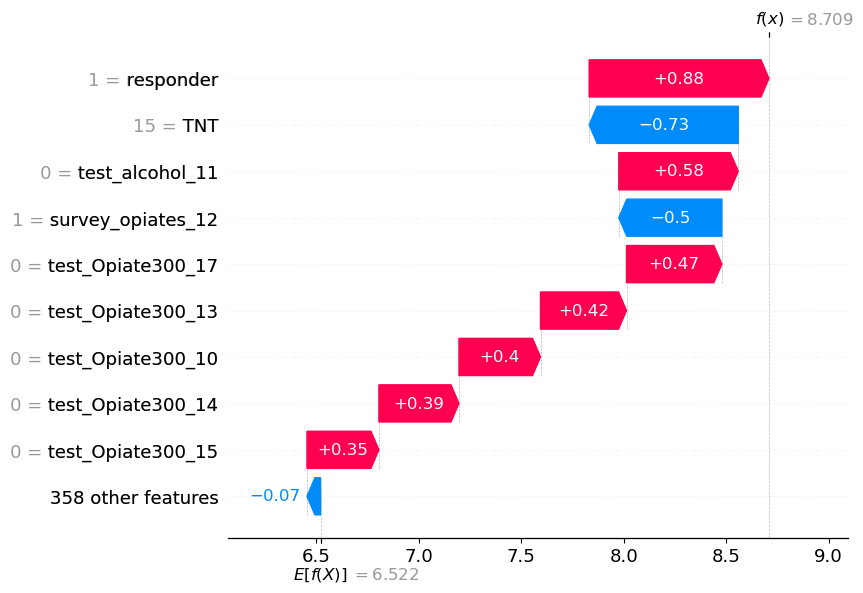

In [20]:
# shap values for the first instance)

shap.plots.waterfall(shap_values[99], max_display=10)

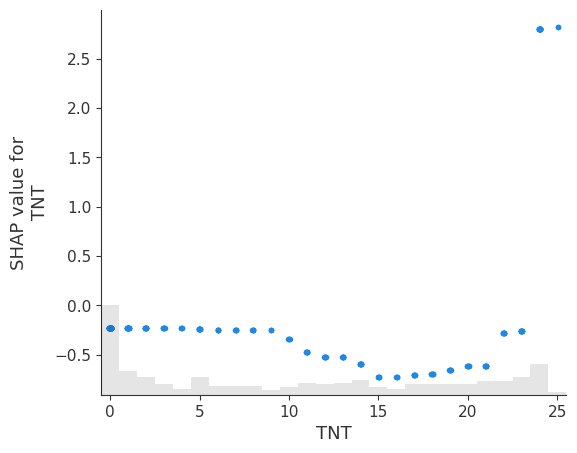

In [23]:
shap.plots.scatter(shap_values[:,'TNT'])

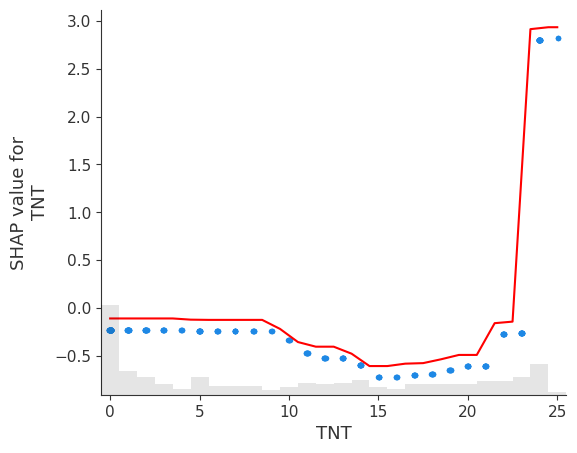

In [24]:
import matplotlib.pyplot as plt
import numpy as np

shap.plots.scatter(shap_values[:,"TNT"], show=False)

# First get the index of the TNT feature
idx = model.explain_global().data()['names'].index('TNT')

# extract the relevant data from the tree-based GAM
explain_data = model.explain_global().data(idx)

# the TNT feature values
x_data = explain_data["names"]

# the part of the prediction function for TNT
y_data = explain_data["scores"]
y_data = np.r_[y_data, y_data[np.newaxis, -1]]
plt.plot(x_data, y_data, color='red')
plt.show()



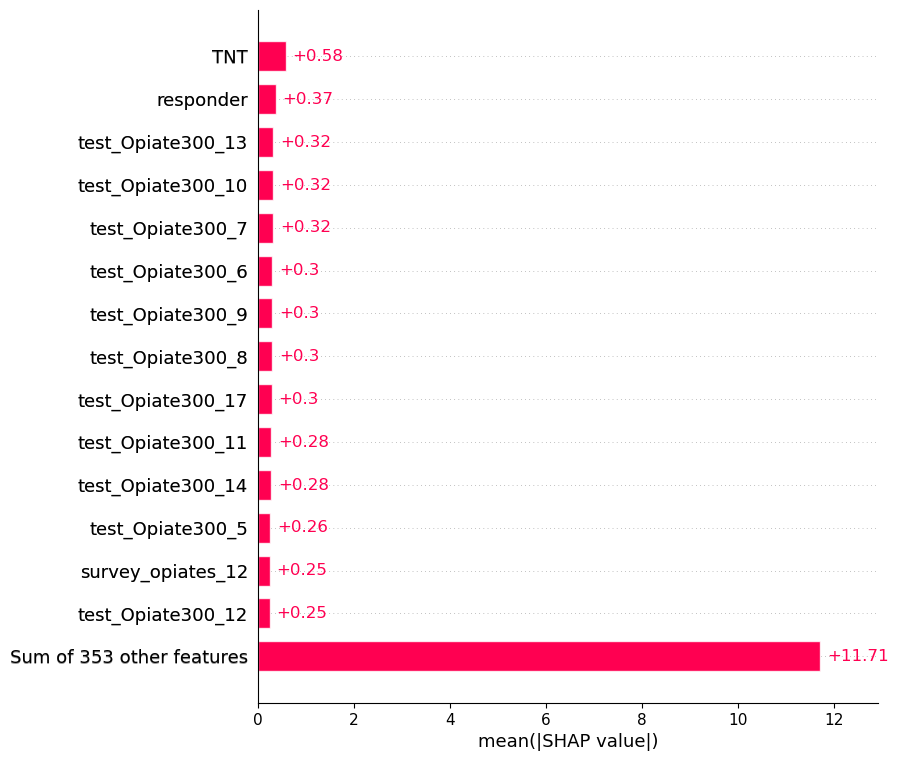

In [26]:
shap.plots.bar(shap_values, max_display=15)